### Import modules

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, Normalizer, OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score, make_scorer, classification_report, confusion_matrix

In [0]:
rs = np.random.RandomState(130917)
warnings.filterwarnings("ignore")

### Import data and check shape of dataset

In [94]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.shape

(150, 5)

### Explore header rows of dataset

In [95]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Set header if not set

In [96]:
df.columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Explore numerical features

In [97]:
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


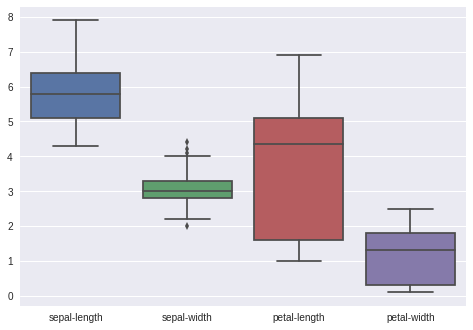

In [98]:
sns.boxplot(data=df)
plt.show()

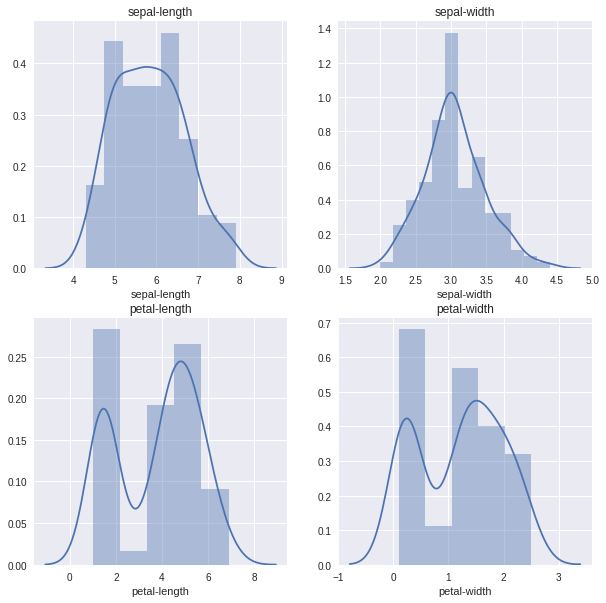

In [99]:
fig, axarr = plt.subplots(2, 2, figsize=(10, 10))
sns.distplot(df['sepal-length'], kde=True, ax=axarr[0,0])
sns.distplot(df['sepal-width'], kde=True, ax=axarr[0,1])
sns.distplot(df['petal-length'], kde=True, ax=axarr[1,0])
sns.distplot(df['petal-width'], kde=True, ax=axarr[1,1])
axarr[0,0].set_title("sepal-length")
axarr[0,1].set_title("sepal-width")
axarr[1,0].set_title("petal-length")
axarr[1,1].set_title("petal-width")
plt.show()

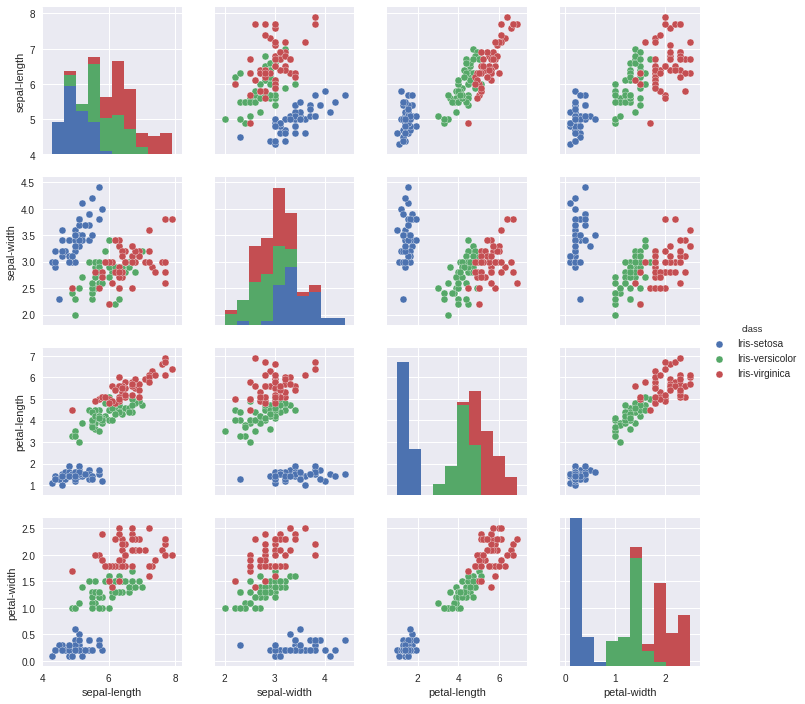

In [100]:
sns.pairplot(data=df, hue='class')
plt.show()

### Explore target variable

In [101]:
print(df['class'].nunique())
df['class'].value_counts()

3


Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: class, dtype: int64

In [102]:
# lets encode the target variable
df['class'] = LabelEncoder().fit(df['class']).transform(df['class'])
df['class'].value_counts()

2    50
1    50
0    50
Name: class, dtype: int64

### Handle missing values

In [103]:
# count of null rows
df.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64

In [104]:
# count of non null rows
df.isnull().count()

sepal-length    150
sepal-width     150
petal-length    150
petal-width     150
class           150
dtype: int64

### Handle highly correlated features

In [105]:
df.corr()

,sepal-length,sepal-width,petal-length,petal-width,class
sepal-length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal-width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal-length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal-width,0.817954,-0.356544,0.962757,1.000000,0.956464
class,0.782561,-0.419446,0.949043,0.956464,1.000000


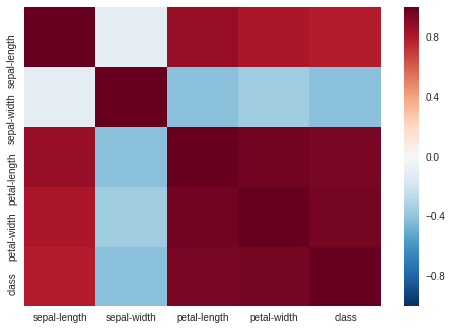

In [106]:
sns.heatmap(df.corr())
plt.show()

### Create new features if required

In [0]:
# no such features required for this dataset

### Create dataframes of continuous and categorical features

In [0]:
cat_columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
# cont_columns = none available for this dataset
df_cont = df[cat_columns]
df_y = df['class']

### Move target column to end of dataframe

In [0]:
#cols = list(df_dummies.columns.values) #Make a list of all of the columns in the df
#cols.pop(cols.index('targ')) #Remove b from list
#df_dummies_1 = df_dummies[cols+['targ']]

### Rescale dataframe of continuous features

In [110]:
df_cont_rescaled = pd.DataFrame(StandardScaler().fit(df_cont).transform(df_cont))
df_cont_rescaled.columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
df_cont_rescaled.head()

,sepal-length,sepal-width,petal-length,petal-width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


### Create dummy variables for categorical columns

In [0]:
# none available in this dataset

### Concat all dataframes - continuous + categorical + target

In [112]:
df_final = pd.concat([df_cont_rescaled, df_y], axis=1)
df_final.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0


### Prepare X and y to train model

In [118]:
X = np.array(df_final.iloc[:,:-1])
y = np.array(df_final.iloc[:,-1]).reshape(-1,1)
print(X.shape, y.shape)

(150, 4) (150, 1)


### Prepare train and test data from dataset

In [0]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, stratify=y, test_size=0.3)

### Prepare list of modules to be used

In [0]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

### Train the model

In [132]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=rs)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.905455 (0.096569)
LDA: 0.962727 (0.061180)
KNN: 0.935455 (0.082166)
CART: 0.934545 (0.082502)
NB: 0.963636 (0.060302)
SVM: 0.963636 (0.060302)


### Fit and Predict

In [133]:
model = SVC()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9333333333333333
[[14  1  0]
 [ 0 15  0]
 [ 0  2 13]]
             precision    recall  f1-score   support

          0       1.00      0.93      0.97        15
          1       0.83      1.00      0.91        15
          2       1.00      0.87      0.93        15

avg / total       0.94      0.93      0.93        45

